In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'

In [2]:
date = 'Feb172023'
CC_df = pd.read_csv('CC_Webb_Predictions_Prob_'+date+'.csv')

CC_val = CC_df[~CC_df['SPICY_Class_0/1'].isna()]#[['Class','SPICY_Class_0/1','Prob YSO','isophotal_vegamag_f200w','isophotal_vegamag_f444w']]

tars = CC_val['SPICY_Class_0/1'].values
preds = CC_val['Class'].values
probs = CC_val['Prob YSO'].values

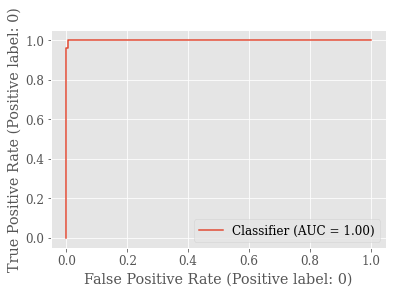

In [3]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(tars,probs,pos_label=0)
# plt.savefig('ROC_Curve_'+date+'.png',dpi=300)

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay


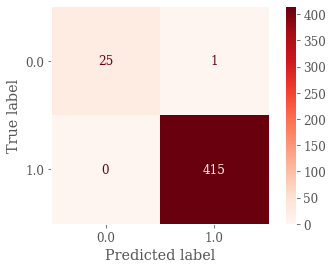

In [5]:

ConfusionMatrixDisplay.from_predictions(tars,preds,cmap='Reds')
plt.grid(False)
# plt.savefig('CM_Dec192022.png',dpi=300)
plt.show()

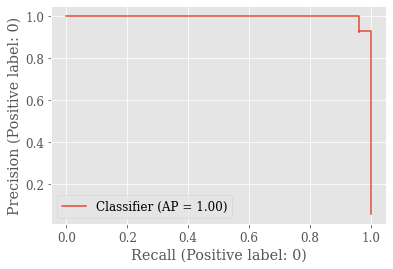

In [6]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(tars,probs,pos_label=0)
# plt.savefig('PRCurve_'+date+'.png',dpi=300)

In [7]:
# Print to file the matches to SPICY and Reiter
from astropy.coordinates import match_coordinates_sky,SkyCoord
import astropy.units as u
CC_Webb_Classified = CC_df

reit = ["10:36:42.3 -58:38:04", "10:36:48.0 -58:38:19", "10:36:47.3 -58:38:10", "10:36:46.7 -58:38:05", "10:36:51.5 -58:37:54", "10:36:50.5 -58:37:52",\
    "10:36:51.4 -58:37:48", "10:36:53.8 -58:37:48", "10:36:51.5 -58:37:10", "10:36:54.2 -58:36:26", "10:36:54.4 -58:36:18", "10:36:54.0 -58:37:20",\
        "10:36:53.6 -58:35:20", "10:36:53.1 -58:37:37", "10:36:53.3 -58:37:54", "10:36:52.7 -58:38:05", "10:36:53.1 -58:37:08", "10:36:51.6 -58:36:58",\
        "10:36:52.3 -58:38:09", "10:36:53.9 -58:36:29", "10:37:01.5 -58:37:51", "10:37:02.1 -58:36:58", "10:36:53.9 -58:36:32"]# End of third row is the end of MHO-only sources
sky_1 = SkyCoord(reit,unit=(u.hourangle, u.deg))
reit_name = ['MHO1632','MHO1633','MHO1634','MHO1635','MHO1636','MHO1637','MHO1638','MHO1639','MHO1640','MHO1643','MHO1645','MHO1647','MHO1649','MHO1650',\
    'MHO1651','MHO1652','MHO1641a','MHO1641b','HH1219','HH1223','HHc-3','HHc-4','HHc-5']
# JWST_NUM

# print('J'+np.array(jwst_spitz_cat.RA)+np.array(jwst_spitz_cat.DEC))
def deg_to_hrminsec(deg):
    deg = deg*u.deg
    h = deg.to(u.hourangle)/u.hourangle
    m = (h%1)*60
    s = (m%1)*60
    return str(int(h))+"{:02d}".format(int(m))+"{:04.1f}".format(s)
def deghr_to_hrminsec(deg):
    h = deg
    # print(Angle(deg,u.hourangle).hms)
    m = 60-(h%1)*60
    s = (m%1)*60
    return str(int(h))+"{:02d}".format(int(m))+"{:02d}".format(int(s))

jwst_num = []



for i, r in enumerate(np.array(CC_Webb_Classified.RA)):
    jwst_num.append('J'+deg_to_hrminsec(r)+deghr_to_hrminsec(np.array(CC_Webb_Classified.DEC)[i]))

CC_Webb_Classified["JWST_NUM"] = jwst_num
idx_REIT, sep2d_REIT, _ = match_coordinates_sky(sky_1,SkyCoord(CC_Webb_Classified[CC_Webb_Classified.Class==0].RA*u.deg, CC_Webb_Classified[CC_Webb_Classified.Class==0].DEC*u.deg))
const_REIT = idx_REIT[sep2d_REIT<0.001*u.deg]
df_reit_tmp = CC_Webb_Classified[CC_Webb_Classified.Class==0].iloc[idx_REIT]#[['JWST_NUM','Class','SPICY_Class','SPICY','isophotal_vegamag_f335m','isophotal_vegamag_f770w','isophotal_vegamag_f1130w','isophotal_vegamag_f1280w']].iloc[idx_REIT]
df_reit_tmp['Close'] = sep2d_REIT<0.001*u.deg
df_reit_tmp['Labels'] = reit_name
df_reit_tmp[df_reit_tmp.Labels=='MHO1639'].values

array([[81, 159.2257823245323, -58.63020937692809, 3.797035576337168e-05,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, 11.861630845676808, 0.0003786321460054, 9.286786534068868,
        3.0863940743635544e-05, 7.901250617048284,
        3.0475097032021644e-05, 0.0, 0.5549999999999999, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, 'J103654.2-583748', True, 'MHO1639']], dtype=object)

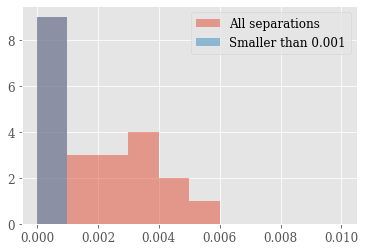

In [8]:

all_reit = [0.010738698, 0.0030221518, 0.0002454566, 0.0017035007, 0.0026192258, 0.00038397731, 0.0024979356, 0.0008758052, 0.0017064029, 0.0010835588, 0.0033054034, 7.7012149*10**(-5), 0.0057181169, 0.0035426762, 0.00088664915, 0.00215021, 0.0037909587, 0.0049347506, 0.00096801806, 0.00014113762, 0.0044752519, 0.00014907766, 0.00061470765]
pass_reit = [0.0002454566, 0.00038397731, 0.0008758052, 7.7012149*10**(-5), 0.00088664915, 0.00096801806, 0.00014113762, 0.00014907766, 0.00061470765]
# sep2d_REIT[sep2d_REIT<0.001*u.deg].to(u.deg)/u.deg
bins = np.arange(0,0.011,0.001)
plt.hist(all_reit,bins,alpha=0.5, label='All separations')
plt.hist(pass_reit,bins,alpha=0.5, label = 'Smaller than 0.001')
plt.legend()

In [9]:
reit_num = []
for i, r in enumerate(np.array(sky_1.ra)):
    reit_num.append('J'+deg_to_hrminsec(r)+deghr_to_hrminsec(np.array(sky_1.dec)[i]))